In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

In [28]:
# read txt
hca = np.genfromtxt('C:/computer_harddrive/2016_oceanus/HPLC/hplc_tchla/hplc_tchla.txt',delimiter='\t')
nor_hca = np.transpose(hca[:,1:9]) / hca[:,8]
nor_hca = np.transpose(nor_hca)

In [29]:
hca.size

972

C:\Users\moon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


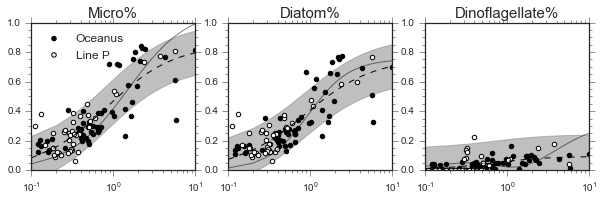

In [99]:
# plot scatter for Micro%
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 9))

# Hirata's model[[Fuco][Perid][Hex fuco][Allo][But fuco][Tot_Chl_b][Zea]]
y = np.arange(0.1, 10, 0.1)
x = np.log10(y)
micro = 1./ (0.9117 + np.exp (-2.7330* x + 0.4003)) #Micro
diatom = 1./ (1.3272 + np.exp (-3.9828* x + 0.1953)) #Diatom
dino = micro - diatom #Dino

#plot in subplots
ax = fig.add_subplot(331) 
plt.fill_between(y, micro_new-0.15, micro_new+0.15, color='grey', alpha=0.5)
plt.plot(y, micro_new, "r--",c='black')#, label='chl-based Micro%'
plt.plot(y, micro, "r-",c='black', alpha=0.5)#, label='chl-based Micro%'
plt.scatter(hca[1:65,0], 1.41 * (nor_hca[1:65,0] + nor_hca[1:65,1]),c='black',edgecolors='black',
            label='Oceanus')
plt.scatter(hca[66:-1,0], 1.41 * (nor_hca[66:-1,0] + nor_hca[66:-1,1]),c='white', edgecolors='black',
            label='Line P')
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Micro%', size=15) # title of plot

ax= fig.add_subplot(332) 
plt.fill_between(y, diatom_new-0.15, diatom_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 1.41 * nor_hca[1:65,0],c='black',edgecolors='black')
plt.scatter(hca[66:-1,0], 1.41 * nor_hca[66:-1,0],c='white',edgecolors='black')
plt.plot(y, diatom_new, "r--",c='black')#, label='chl-based Diatom%'
plt.plot(y, diatom, "r-",c='black', alpha=0.5)#, label='chl-based Diatom%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Diatom%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, dino_new-0.15, dino_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 1.41 * nor_hca[1:65,1], c='black',edgecolors='black') #
plt.scatter(hca[66:-1,0], 1.41 * nor_hca[66:-1,1], c='white',edgecolors='black') #
plt.plot(y, dino_new, "r--", c='black') #, label='chl-based Dinoflagellate%'
plt.plot(y, dino, "r-", c='black', alpha=0.5) #, label='chl-based Dinoflagellate%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Dinoflagellate%',size=15)

plt.show()

C:\Users\moon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


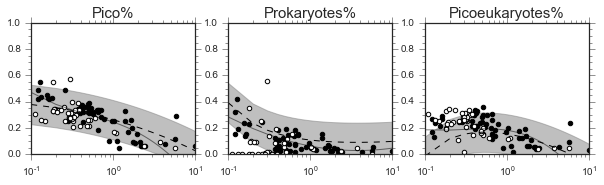

In [93]:
# plot scatter for Pico
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 8))

# Hirata's model[[Fuco][Perid][Hex fuco][Allo][But fuco][Tot_Chl_b][Zea]]
y = np.arange(0.1, 10, 0.1)
x = np.log10(y)
pico = -1./ (0.1529 + np.exp (1.0306* x - 1.5576)) - 1.8597*x +2.9954
prokaryotes = (0.0067/0.6154/y)*np.exp(-19.5190*((x + 0.9643)**2)/(0.0067**2)) + 0.1027*(x**2) \
    -0.1189*x +0.0626
picoeukaryotes = pico - prokaryotes
    
#plot in subplots
ax = fig.add_subplot(331) 
plt.fill_between(y, pico_new-0.15, pico_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 0.86 * nor_hca[1:65,6] + 0.5* 1.27*nor_hca[1:65,2],
            c='black',edgecolors='black')
plt.scatter(hca[66:-1,0], 0.86 * nor_hca[66:-1,6] + 0.5* 1.27*nor_hca[66:-1,2],
            c='white',edgecolors='black')
plt.plot(y, pico_new, "r--",c='black')#, label='chl-based Pico%'
plt.plot(y, pico, "r-",c='black', alpha=0.5)#, label='chl-based Pico%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Pico%',size=15)

ax = fig.add_subplot(332) 
plt.fill_between(y, prokaryotes_new-0.15, prokaryotes_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 0.86 * nor_hca[1:65,6],c='black',edgecolors='black')
plt.scatter(hca[66:-1,0], 0.86 * nor_hca[66:-1,6],c='white',edgecolors='black')
plt.plot(y, prokaryotes_new, "r--",c='black')#, label='chl-based Prokaryotes%'
plt.plot(y, prokaryotes, "r-",c='black', alpha=0.5)#, label='chl-based Prokaryotes%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Prokaryotes%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, picoeukaryotes_new-0.15, picoeukaryotes_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 0.5* 1.27*nor_hca[1:65,2],c='black',edgecolors='black')
plt.scatter(hca[66:-1,0], 0.5* 1.27*nor_hca[66:-1,2],c='white',edgecolors='black')
plt.plot(y, picoeukaryotes_new, "r--",c='black')#, label='chl-based Picoeukaryotes%'
plt.plot(y, picoeukaryotes, "r-",c='black', alpha=0.5)#, label='chl-based Picoeukaryotes%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Picoeukaryotes%',size=15)

plt.show()

C:\Users\moon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


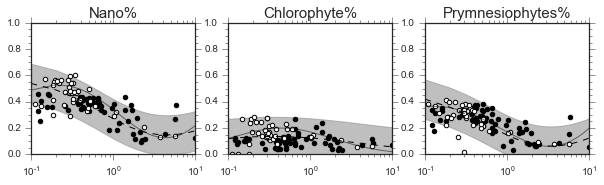

In [98]:
# plot scatter for Nano
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 8))

# Hirata's model[[Fuco][Perid][Hex fuco][Allo][But fuco][Tot_Chl_b][Zea]]
y = np.arange(0.1, 10, 0.1)
x = np.log10(y)
nano = 1 - micro - pico
greenalgae = (0.2490/y) * np.exp(-1.2621*(x-0.5523)**2)
prymnesiophytes = nano - greenalgae
    
#plot in subplots
ax = fig.add_subplot(331) 
plt.fill_between(y, nano_new-0.15, nano_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 0.5* 1.27*nor_hca[1:65,2]+1.01*nor_hca[1:65,5]+0.35*nor_hca[1:65,4]
           +0.6*nor_hca[1:65,3],c='black',edgecolors='black')
plt.scatter(hca[66:-1,0], 0.5* 1.27*nor_hca[66:-1,2]+1.01*nor_hca[66:-1,5]+0.35*nor_hca[66:-1,4]
           +0.6*nor_hca[66:-1,3],c='white',edgecolors='black')
plt.plot(y, nano_new, "r--",c='black')#, label='chl-based Nano%'
plt.plot(y, nano, "r-",c='black', alpha=0.5)#, label='chl-based Nano%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Nano%',size=15)

ax = fig.add_subplot(332) 
plt.fill_between(y, greenalgae_new-0.15, greenalgae_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 1.01*nor_hca[1:65,5],c='black',edgecolors='black')
plt.scatter(hca[66:-1,0], 1.01*nor_hca[66:-1,5],c='white',edgecolors='black')
plt.plot(y, greenalgae_new, "r--",c='black')#, label='chl-based Green algae%'
plt.plot(y, greenalgae, "r-",c='black', alpha=0.5)#, label='chl-based Green algae%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Chlorophyte%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, prymnesiophytes_new-0.15, prymnesiophytes_new+0.15, color='grey', alpha=0.5)
plt.scatter(hca[1:65,0], 0.5* 1.27*nor_hca[1:65,2]+0.35*nor_hca[1:65,4]
           +0.6*nor_hca[1:65,3], c='black',edgecolors='black')
plt.scatter(hca[66:-1,0], 0.5* 1.27*nor_hca[66:-1,2]+0.35*nor_hca[66:-1,4]
           +0.6*nor_hca[66:-1,3], c='white',edgecolors='black')
plt.plot(y, prymnesiophytes_new, "r--",c='black')#, label='chl-based Prymnesiophytes%'
plt.plot(y, prymnesiophytes, "r-",c='black', alpha=0.5)#, label='chl-based Prymnesiophytes%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Prymnesiophytes%',size=15)

plt.show()

In [36]:
import pandas as pd
data=pd.DataFrame()
y=hca[:,0]
x=np.log10(y)
data['chl']=y
data['micro_chl']= 1./ (0.9117 + np.exp (-2.7330* x + 0.4003)) #Micro
data['micro']=1.41 * (nor_hca[:,0] + nor_hca[:,1])

data['diatom_chl']=1./ (1.3272 + np.exp (-3.9828* x + 0.1953)) #Diatom
data['diatom']=1.41 * nor_hca[:,0]
                      
data['dino_chl'] = data['micro_chl'] - data['diatom_chl'] #Dino
data['dino']=1.41 * nor_hca[:,1]

data['pico_chl']=-1./ (0.1529 + np.exp (1.0306* x - 1.5576)) - 1.8597*x +2.9954
data['pico']=0.86 * nor_hca[:,6] + 0.5* 1.27*nor_hca[:,2]

data['prok_chl']=(0.0067/0.6154/y)*np.exp(-19.5190*((x + 0.9643)**2)/(0.0067**2)) + 0.1027*(x**2) \
    -0.1189*x +0.0626
data['prok']= 0.86 * nor_hca[:,6]

data['picoeu_chl']=data['pico_chl']-data['prok_chl']
data['picoeu']=0.5* 1.27*nor_hca[:,2]

data['nano_chl']=data['micro_chl']-data['pico_chl']
data['nano']=0.5* 1.27*nor_hca[:,2]+1.01*nor_hca[:,5]+0.35*nor_hca[:,4]+0.6*nor_hca[:,3]

data['ga_chl']=(0.2490/y) * np.exp(-1.2621*(x-0.5523)**2)
data['ga']=1.01*nor_hca[:,5]

data['pry_chl']=data['nano_chl']-data['ga_chl']
data['pry']=0.5* 1.27*nor_hca[:,2]+0.35*nor_hca[:,4]+0.6*nor_hca[:,3]

In [ ]:
import scipy
sp = ['micro','diatom','dino','pico','prok','picoeu','nano',
      'ga','pry']

for si in sp:
    x = data['%s' % (si)]
    y = data['%s_chl' % (si)]
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
    print('%s' % (si), slope, intercept, r_value, p_value, std_err)

In [63]:
# curve fitting for MICRO
def func(x, a0, a1, a2):
  return 1./(a0+np.exp(a1*x+a2))

xdata = np.log10(data['chl'].values)
ydata = data['micro'].values

popt_micro, pcov = curve_fit(func, xdata, ydata,p0=(0.9117,-2.7330,0.4003))
sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2]])

(array([-0.39147397, -0.55129368, -0.40893539, -0.36754271, -0.18177411,
        -0.37882372, -0.3053948 , -0.39254498,  0.14395112, -0.14387556,
        -0.29584948, -0.24108811, -0.42481216,  0.14332713, -0.25258819,
        -0.4225082 , -0.26921772, -0.31158018, -0.39685563, -0.36754271,
        -0.40782324, -0.30016227, -0.37468755, -0.17979854,  0.18525877,
         0.21906033,  0.04766419, -0.10846254, -0.33161408,  0.62900162,
         0.24079877,  0.01241537,  0.29446623,  0.74803289,  0.23095956,
         0.26552534,  0.38399479,  0.34693946,  0.32242605,  0.33385015,
        -0.19586057, -0.79317412, -0.92081875, -0.7878124 , -0.81247928,
        -0.87942607, -0.91721463, -0.74232143, -0.18842499,  1.24114786,
         0.76596642,  0.0733517 , -0.05354773, -0.01547269, -0.59176003,
         1.09384177,  1.11461098,  1.26356506,  0.99633652, -0.18309616,
        -0.14691047, -0.29670862, -0.39040559, -0.89279003, -0.42829117,
        -0.1700533 , -0.29584948, -0.52724355, -0.7

In [65]:
# curve fitting for DIATOM
def func(x, a0, a1, a2):
  return 1./ (a0 + np.exp (a1* x +a2 )) 

xdata = np.log10(data['chl'].values)
ydata = data['diatom'].values

popt_diatom, pcov = curve_fit(func, xdata, ydata,p0=(1.3272,-3.9828,0.1953))
sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2]])


In [62]:
# curve fitting for PICO
def func(x, a0, a1, a2, a3, a4):
  return -1./ (a0 + np.exp (a1* x + a2)) + a3*x +a4

xdata = np.log10(data['chl'].values)
ydata = data['pico'].values

popt_pico, pcov = curve_fit(func, xdata, ydata,p0=(0.1529,1.0306,-1.5576,-1.8597,2.9954),maxfev = 2000)
sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2],pcov[3,3],pcov[4,4]])
(popt_pico[0],popt_pico[1],popt_pico[2],
popt_pico[3],popt_pico[4])

(7.2516255774638099,
 320.61774031400444,
 -239.46723555687973,
 -0.2338558870056443,
 0.35203023390254479)

In [68]:
# curve fitting for prokary
def func(x, a0, a1, a2, a3, a4, a5, a6):
  return ((a0/a1/(10**x))*np.exp(a2*((x + a3)**2)/(a1**2)) + a4*(x**2) +a5*x +a6)

xdata = np.log10(data['chl'].values)
ydata = data['prok'].values

mask=np.nonzero(ydata) 
popt_prokary,pcov = curve_fit(func, xdata[mask], ydata[mask],p0=(0.0067,0.6154,-19.5190,0.9643,0.1027,-0.1189,0.0626),
                              method='trf')#maxfev=10000
sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2],pcov[3,3],pcov[4,4],pcov[5,5],pcov[6,6]])


In [96]:
# curve fitting for greenalgae
def func(x, a0, a1, a2):
  return (a0/(10**x)) * np.exp(a1*(x+a2)**2)

xdata = np.log10(data['chl'].values)
ydata = data['ga'].values

mask=np.nonzero(ydata) 
popt_ga, pcov = curve_fit(func, xdata, ydata,p0=(0.2490,-1.2621,-0.5523))
sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2]])
popt_ga[0],popt_ga[1],popt_ga[2]
#xdata,ydata

(1.1121553451222659, -0.41842411152972897, -2.2905401953845637)

In [97]:
# Hirata's model
y = np.arange(0.1, 10, 0.1)
x = np.log10(y)
micro_new = 1./ (popt_micro[0] + np.exp (popt_micro[1]* x + popt_micro[2])) #Micro
diatom_new = 1./ (popt_diatom[0] + np.exp (popt_diatom[1]* x + popt_diatom[2])) #Diatom
dino_new = micro_new - diatom_new #Dino

pico_new = -1./ (-0.061 + np.exp (-0.112* x -1.293)) + 0.503 *x +4.947
prokaryotes_new = (-0.253/-8.154/y)*np.exp(-17.3*((x + 1.214)**2)/
                                                             (-8.154**2)) + 0.02*(x**2) \
    +0.004*x +0.0626
picoeukaryotes_new = pico_new - prokaryotes_new

nano_new = 1 - micro_new - pico_new
greenalgae_new = (popt_ga[0]/y) * np.exp(popt_ga[1]*(x+popt_ga[2])**2)
prymnesiophytes_new = nano_new - greenalgae_new


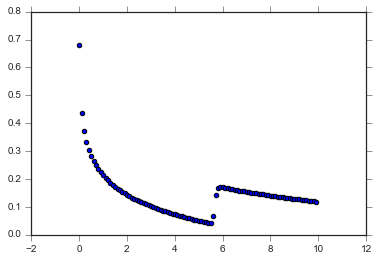

In [58]:
plt.scatter(y,pico_new)

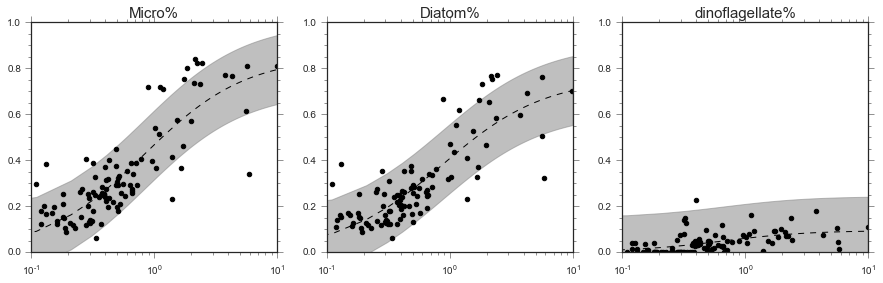

In [55]:
# extract surface samples
fig = plt.figure(figsize=(15, 14))

ax = fig.add_subplot(331) 
plt.fill_between(y, micro_new-0.15, micro_new+0.15, color='grey', alpha=0.5)
plt.plot(y, micro_new, "r--",c='black')#, label='chl-based Micro%'
plt.scatter(data['chl'], data['micro'],c='black',edgecolors='black')
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('Micro%',size=15)

ax= fig.add_subplot(332) 
plt.fill_between(y, diatom_new-0.15, diatom_new+0.15, color='grey', alpha=0.5)
plt.scatter(data['chl'], data['diatom'],c='black',edgecolors='black')
plt.plot(y, diatom_new, "r--",c='black')#, label='chl-based Diatom%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('Diatom%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, dino_new-0.15, dino_new+0.15, color='grey', alpha=0.5)
plt.scatter(data['chl'], data['dino'], c='black',edgecolors='black') #
plt.plot(y, dino_new, "r--", c='black') #, label='chl-based Dinoflagellate%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('dinoflagellate%',size=15)

plt.show()

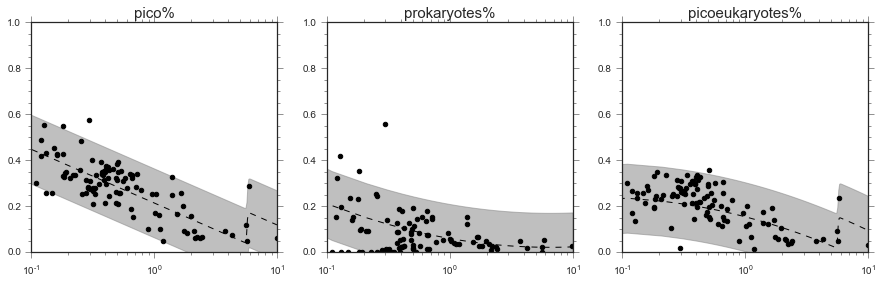

In [56]:
fig = plt.figure(figsize=(15, 14))

ax = fig.add_subplot(331) 
plt.fill_between(y, pico_new-0.15, pico_new+0.15, color='grey', alpha=0.5)
plt.plot(y, pico_new, "r--",c='black')#, label='chl-based Micro%'
plt.scatter(data['chl'], data['pico'],c='black',edgecolors='black')
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('pico%',size=15)

ax= fig.add_subplot(332) 
plt.fill_between(y, prokaryotes_new-0.15, prokaryotes_new+0.15, color='grey', alpha=0.5)
plt.scatter(data['chl'], data['prok'],c='black',edgecolors='black')
plt.plot(y, prokaryotes_new, "r--",c='black')#, label='chl-based Diatom%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('prokaryotes%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, picoeukaryotes_new-0.15, picoeukaryotes_new+0.15, color='grey', alpha=0.5)
plt.scatter(data['chl'], data['picoeu'], c='black',edgecolors='black') #
plt.plot(y, picoeukaryotes_new, "r--", c='black') #, label='chl-based Dinoflagellate%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('picoeukaryotes%',size=15)

plt.show()

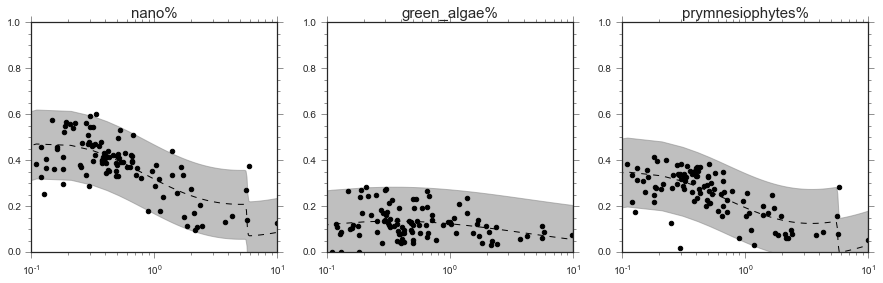

In [71]:
fig = plt.figure(figsize=(15, 14))

ax = fig.add_subplot(331) 
plt.fill_between(y, nano_new-0.15, nano_new+0.15, color='grey', alpha=0.5)
plt.plot(y, nano_new, "r--",c='black')#, label='chl-based Micro%'
plt.scatter(data['chl'], data['nano'],c='black',edgecolors='black')
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('nano%',size=15)

ax= fig.add_subplot(332) 
plt.fill_between(y, greenalgae_new-0.15, greenalgae_new+0.15, color='grey', alpha=0.5)
plt.scatter(data['chl'], data['ga'],c='black',edgecolors='black')
plt.plot(y, greenalgae_new, "r--",c='black')#, label='chl-based Diatom%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('green_algae%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, prymnesiophytes_new-0.15, prymnesiophytes_new+0.15, color='grey', alpha=0.5)
plt.scatter(data['chl'], data['pry'], c='black',edgecolors='black') #
plt.plot(y, prymnesiophytes_new, "r--", c='black') #, label='chl-based Dinoflagellate%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.minorticks_on()
ax.set_title('prymnesiophytes%',size=15)

plt.show()

In [ ]:
from scipy import stats
sns.set_style("ticks")
fig = plt.figure(figsize=(6, 4))
marker = ['o', '.', '*', 'v', '^', '<', '>', 's', 'd']
sp = ['micro','diatom','dino','pico','prok','picoeu','nano','ga','pry']

for si, m in zip(sp, marker):
    x = data['%s' % (si)]
    y = data['%s_chl' % (si)]
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
    plt.plot(data['%s' % (si)],data['%s_chl' % (si)],m, 
             label='%s R=%.3f' % (si, std_err) )
    #np.sqrt(np.nanmean(df['%s_diff_field' % (si)]))

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.05))
plt.xlabel('DPA taxonomy%')
plt.ylabel('[chl] taxonomy%')
plt.gca().set_aspect('equal', adjustable='box')